### Importing  Libraries

In [2]:
# Importing warnings module to handle warning messages
import warnings   
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
# To ignore all warnings generated by the program
warnings.filterwarnings("ignore")  
# Setting seaborn style to white
sns.set_style("white")  

### Loading in and inspecting the data

In [3]:
df = pd.read_csv(r'games.csv')
df.head()

,Unnamed: 0,Title,Release_Date,Developers,Summary,Platforms,Genres,Rating,Plays,Playing,Backlogs,Wishlist,Lists,Reviews
0,0,Elden Ring,"Feb 25, 2022","['FromSoftware', 'Bandai Namco Entertainment']","Elden Ring is a fantasy, action and open world...","['Windows PC', 'PlayStation 4', 'Xbox One', 'P...","['Adventure', 'RPG']",4.5,21K,4.1K,5.6K,5.5K,4.6K,3K
1,1,The Legend of Zelda: Breath of the Wild,"Mar 03, 2017","['Nintendo', 'Nintendo EPD Production Group No...",The Legend of Zelda: Breath of the Wild is the...,"['Wii U', 'Nintendo Switch']","['Adventure', 'Puzzle']",4.4,35K,3.1K,5.6K,3K,5.1K,3K
2,2,Hades,"Dec 07, 2018",['Supergiant Games'],A rogue-lite hack and slash dungeon crawler in...,"['Windows PC', 'Mac', 'PlayStation 4', 'Xbox O...","['Adventure', 'Brawler', 'Indie', 'RPG']",4.3,25K,3.5K,7.3K,4K,3.2K,2.1K
3,3,Hollow Knight,"Feb 24, 2017",['Team Cherry'],A 2D metroidvania with an emphasis on close co...,"['Windows PC', 'Mac', 'Linux', 'Nintendo Switch']","['Adventure', 'Indie', 'Platform']",4.4,25K,2.7K,9.6K,2.6K,3.4K,2.1K
4,4,Undertale,"Sep 15, 2015","['tobyfox', '8-4']","A small child falls into the Underground, wher...","['Windows PC', 'Mac', 'Linux', 'PlayStation 4'...","['Adventure', 'Indie', 'RPG', 'Turn Based Stra...",4.2,32K,728,5.7K,2.1K,3.9K,2.5K


In [4]:
df.describe()

,Unnamed: 0,Rating
count,60000.000000,25405.000000
mean,29999.500000,3.033171
std,17320.652413,0.735573
min,0.000000,0.300000
25%,14999.750000,2.600000
50%,29999.500000,3.100000
75%,44999.250000,3.500000
max,59999.000000,5.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    60000 non-null  int64  
 1   Title         60000 non-null  object 
 2   Release_Date  60000 non-null  object 
 3   Developers    60000 non-null  object 
 4   Summary       55046 non-null  object 
 5   Platforms     60000 non-null  object 
 6   Genres        60000 non-null  object 
 7   Rating        25405 non-null  float64
 8   Plays         60000 non-null  object 
 9   Playing       60000 non-null  object 
 10  Backlogs      60000 non-null  object 
 11  Wishlist      60000 non-null  object 
 12  Lists         60000 non-null  object 
 13  Reviews       60000 non-null  object 
dtypes: float64(1), int64(1), object(12)
memory usage: 6.4+ MB


In [7]:
# Taking a look at a sample from the dataset
df.sample(2)

,Unnamed: 0,Title,Release_Date,Developers,Summary,Platforms,Genres,Rating,Plays,Playing,Backlogs,Wishlist,Lists,Reviews
52581,52581,Star Wars Racer and Commando Combo,"Oct 26, 2021","['THQ Nordic', 'Lucasfilm Games']",Get two classic Star Wars games with the Star ...,"['PlayStation 4', 'Nintendo Switch']","['Racing', 'Shooter']",NaN,4,1,6,5,6,1
15980,15980,Monster Rancher Advance,"Dec 07, 2001","['Tecmo Co., Ltd.']",Monster Rancher Advance is a monster-raising s...,['Game Boy Advance'],"['RPG', 'Simulator']",3.0,61,2,19,7,11,1


In [8]:
for col in df.columns.to_list():
    print(col)

Unnamed: 0
Title
Release_Date
Developers
Summary
Platforms
Genres
Rating
Plays
Playing
Backlogs
Wishlist
Lists
Reviews


#### Checking for duplicates and null values

In [9]:
dupl_sum = df.duplicated().sum()
print(f"Current Duplicates = {dupl_sum}")

if dupl_sum > 0:
    df.drop_duplicates(inplace=True)
    updated_dupl_sum = df.duplicated().sum()
    print(f"Updated Duplicates = {updated_dupl_sum}")
else:
    print("No duplicates to update.")

Current Duplicates = 0
No duplicates to update.


In [10]:
is_null = df.isnull().sum()
print(f"Current Null Values = {is_null.sum()}")

if is_null.sum() > 0:
    df.dropna(inplace=True)
    updated_is_null = df.isnull().sum()
    print(f"Updated Null Values = {updated_is_null.sum()}")
else:
    print("No null values to update.")


Current Null Values = 39549
Updated Null Values = 0


In [11]:
df.columns

Index(['Unnamed: 0', 'Title', 'Release_Date', 'Developers', 'Summary',
       'Platforms', 'Genres', 'Rating', 'Plays', 'Playing', 'Backlogs',
       'Wishlist', 'Lists', 'Reviews'],
      dtype='object')

### Data Cleaning and Preprocessing

In [ ]:
col_names = ['Unnamed: 0', 'Developers', 'Summary', 'Lists', 'Reviews']
df = df.drop(columns=col_names)
df.head(30) 

In [13]:
rename_mapper = {"Plays":"no_of_plays", "Playing":"active_players"}
df.rename(columns=rename_mapper, inplace=True)
df.head()

,Title,Release_Date,Platforms,Genres,Rating,no_of_plays,active_players,Backlogs,Wishlist
0,Elden Ring,"Feb 25, 2022","['Windows PC', 'PlayStation 4', 'Xbox One', 'P...","['Adventure', 'RPG']",4.5,21K,4.1K,5.6K,5.5K
1,The Legend of Zelda: Breath of the Wild,"Mar 03, 2017","['Wii U', 'Nintendo Switch']","['Adventure', 'Puzzle']",4.4,35K,3.1K,5.6K,3K
2,Hades,"Dec 07, 2018","['Windows PC', 'Mac', 'PlayStation 4', 'Xbox O...","['Adventure', 'Brawler', 'Indie', 'RPG']",4.3,25K,3.5K,7.3K,4K
3,Hollow Knight,"Feb 24, 2017","['Windows PC', 'Mac', 'Linux', 'Nintendo Switch']","['Adventure', 'Indie', 'Platform']",4.4,25K,2.7K,9.6K,2.6K
4,Undertale,"Sep 15, 2015","['Windows PC', 'Mac', 'Linux', 'PlayStation 4'...","['Adventure', 'Indie', 'RPG', 'Turn Based Stra...",4.2,32K,728,5.7K,2.1K


In [14]:
df.dtypes

Title              object
Release_Date       object
Platforms          object
Genres             object
Rating            float64
no_of_plays        object
active_players     object
Backlogs           object
Wishlist           object
dtype: object

In [15]:
def convert_str_num_to_int(df: pd.DataFrame, col_names: list) -> pd.DataFrame:
    new_df = df.copy()
    for col in col_names:
        new_df[col] = new_df[col].str.replace("K", "000")
        # Multiply the values by 1000 to handle decimal values correctly
        new_df[col] = new_df[col].map(lambda x: int(float(x) * 1000) if '.' in x else int(x))

    return new_df

In [16]:
numerical_cols = ["no_of_plays", "active_players", "Backlogs", "Wishlist"]
df = convert_str_num_to_int(df, numerical_cols)
df.head()

,Title,Release_Date,Platforms,Genres,Rating,no_of_plays,active_players,Backlogs,Wishlist
0,Elden Ring,"Feb 25, 2022","['Windows PC', 'PlayStation 4', 'Xbox One', 'P...","['Adventure', 'RPG']",4.5,21000,4100,5600,5500
1,The Legend of Zelda: Breath of the Wild,"Mar 03, 2017","['Wii U', 'Nintendo Switch']","['Adventure', 'Puzzle']",4.4,35000,3100,5600,3000
2,Hades,"Dec 07, 2018","['Windows PC', 'Mac', 'PlayStation 4', 'Xbox O...","['Adventure', 'Brawler', 'Indie', 'RPG']",4.3,25000,3500,7300,4000
3,Hollow Knight,"Feb 24, 2017","['Windows PC', 'Mac', 'Linux', 'Nintendo Switch']","['Adventure', 'Indie', 'Platform']",4.4,25000,2700,9600,2600
4,Undertale,"Sep 15, 2015","['Windows PC', 'Mac', 'Linux', 'PlayStation 4'...","['Adventure', 'Indie', 'RPG', 'Turn Based Stra...",4.2,32000,728,5700,2100


In [17]:
def drop_columns(df: pd.DataFrame, cols_to_drop: list = None, 
                 idx_to_drop: list = None) -> pd.DataFrame:

    # Create a copy of the original DataFrame
    new_df = df.copy()

    # Drop the specified columns from the DataFrame
    if cols_to_drop is not None:
        new_df = new_df.drop(columns=cols_to_drop)

    # Drop the specified rows from the DataFrame, if any
    if idx_to_drop is not None:
        new_df = new_df.drop(index=idx_to_drop)

    return new_df

In [18]:
pd.set_option('display.max_rows', None)
print(df['Release_Date'])

0        Feb 25, 2022
1        Mar 03, 2017
2        Dec 07, 2018
3        Feb 24, 2017
4        Sep 15, 2015
5        Nov 18, 2011
6        Dec 25, 2020
7        May 12, 2023
8        Mar 24, 2023
9        Feb 23, 2017
10       Oct 31, 2019
11       Jun 15, 2018
12       Oct 07, 2021
13       Apr 18, 2011
14       Apr 20, 2018
15       Jan 25, 2023
16       Jan 25, 2018
17       Mar 24, 2015
18       Jul 19, 2022
19       Mar 12, 2015
20       Oct 26, 2018
21       Oct 27, 2017
22       Oct 10, 2007
23       Sep 17, 2013
24       Feb 19, 2013
25       Dec 09, 2020
26       Nov 09, 2022
27       Jan 28, 2022
28       Sep 07, 2018
29       Mar 30, 2021
30       Mar 24, 2016
31       Jul 29, 2022
32       Jun 23, 1996
33       Sep 29, 2017
34       Mar 25, 2022
35       Dec 07, 2018
36       Mar 22, 2019
37       Apr 22, 2021
38       Jan 25, 2019
39       Jan 31, 1997
40       Oct 27, 2022
41       Sep 28, 2020
42       Jun 15, 2012
43       May 06, 2021
44       May 28, 2019
45       O

In [19]:
err = df["Release_Date"] == "TBD"
df[err]

,Title,Release_Date,Platforms,Genres,Rating,no_of_plays,active_players,Backlogs,Wishlist
798,Deltarune,TBD,"['Windows PC', 'Mac', 'PlayStation 4', 'Ninten...","['Adventure', 'Indie', 'Music', 'Puzzle', 'RPG']",4.3,1800,109,634,810
1277,Fable,TBD,"['Windows PC', 'Xbox Series']",['RPG'],3.8,14,0,64,348
1310,Silent Hill f,TBD,[],[],2.0,9,0,237,704
1450,Pragmata,TBD,"['Windows PC', 'PlayStation 5', 'Xbox Series']",['Adventure'],3.4,5,1,83,539
1466,Elden Ring: Shadow of the Erdtree,TBD,"['Windows PC', 'PlayStation 4', 'Xbox One', 'P...","['Adventure', 'RPG']",4.8,11,1,155,353
1763,BLACK SOULS,TBD,[],[],4.0,183,10,114,107
2543,Marvel's Wolverine,TBD,['PlayStation 5'],"['Adventure', 'Brawler']",4.7,17,0,104,836
2682,Marvel's Wolverine,TBD,['PlayStation 5'],"['Adventure', 'Brawler']",4.7,17,0,104,836
3671,Cool Riders,TBD,[],[],3.8,6,0,6,5
3887,Persona 5: The Phantom X,TBD,"['Windows PC', 'Android', 'iOS']","['Adventure', 'RPG', 'Turn Based Strategy']",1.6,13,1,18,49


In [20]:
df = drop_columns(df, idx_to_drop=df[err].index)

In [21]:
df["Release_Date"] = pd.to_datetime(df["Release_Date"])
df["Release_Date"].dtype

dtype('<M8[ns]')

In [22]:
df["Release_Date"]

0       2022-02-25
1       2017-03-03
2       2018-12-07
3       2017-02-24
4       2015-09-15
5       2011-11-18
6       2020-12-25
7       2023-05-12
8       2023-03-24
9       2017-02-23
10      2019-10-31
11      2018-06-15
12      2021-10-07
13      2011-04-18
14      2018-04-20
15      2023-01-25
16      2018-01-25
17      2015-03-24
18      2022-07-19
19      2015-03-12
20      2018-10-26
21      2017-10-27
22      2007-10-10
23      2013-09-17
24      2013-02-19
25      2020-12-09
26      2022-11-09
27      2022-01-28
28      2018-09-07
29      2021-03-30
30      2016-03-24
31      2022-07-29
32      1996-06-23
33      2017-09-29
34      2022-03-25
35      2018-12-07
36      2019-03-22
37      2021-04-22
38      2019-01-25
39      1997-01-31
40      2022-10-27
41      2020-09-28
42      2012-06-15
43      2021-05-06
44      2019-05-28
45      2010-10-19
46      2007-11-01
47      2016-05-12
48      2016-02-26
49      2001-09-24
50      2020-06-19
51      2015-05-19
52      2005

## Exploratory Data Analysis

In [23]:
df.columns

Index(['Title', 'Release_Date', 'Platforms', 'Genres', 'Rating', 'no_of_plays',
       'active_players', 'Backlogs', 'Wishlist'],
      dtype='object')

In [24]:
df['Genres']

0                                     ['Adventure', 'RPG']
1                                  ['Adventure', 'Puzzle']
2                 ['Adventure', 'Brawler', 'Indie', 'RPG']
3                       ['Adventure', 'Indie', 'Platform']
4        ['Adventure', 'Indie', 'RPG', 'Turn Based Stra...
5                               ['Adventure', 'Simulator']
6        ['Adventure', 'Indie', 'RPG', 'Turn Based Stra...
7                                            ['Adventure']
8                       ['Adventure', 'Puzzle', 'Shooter']
9                                       ['Brawler', 'RPG']
10             ['Adventure', 'RPG', 'Turn Based Strategy']
11                                   ['Indie', 'Strategy']
12                               ['Adventure', 'Platform']
13          ['Adventure', 'Platform', 'Puzzle', 'Shooter']
14                         ['Adventure', 'Brawler', 'RPG']
15           ['Adventure', 'Brawler', 'Music', 'Platform']
16                      ['Adventure', 'Indie', 'Platform

In [25]:
df['Genres'] = df['Genres'].str.replace('[\[\]\'\"]', "")
genres =   df['Genres'].str.get_dummies(",")
popularity = genres.sum().sort_values(ascending=False)
popularity.head()

['Adventure'    8584
 'Indie'        3573
 'Strategy']    2362
 'Shooter']     2258
 'RPG']         1828
dtype: int64

#### Plotting the Top 10 Most Popular Video Games Genres

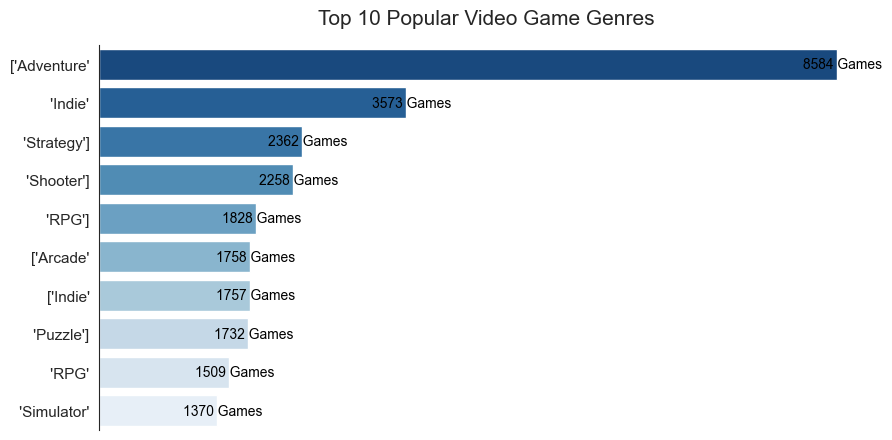

In [26]:
# Setting the plot's figure size
fig, ax = plt.subplots(figsize=(10, 5))

# Plotting the horizontal bar chart
sns.barplot(x=popularity[:10].values, y=popularity[:10].index, palette="Blues_r", ax=ax)

# Adding labels showing the popularity of each genre
for i, v in enumerate(popularity[:10].values):
    ax.text(v + 130 / 2, i, str(f"{v} Games"), color="black", ha="center", va="center")

# Setting the title and axis labels
ax.set_title("Top 10 Popular Video Game Genres", fontsize=15, pad=15)
ax.set_xlabel("")
ax.set_ylabel("")

# Removing the x-axis tick labels
ax.set_xticklabels([])

# Increasing the fontsize of the y-axis tick labels
ax.tick_params(axis="y", labelsize=11)

# Removing the spines from the right and top sides of the plot
sns.despine(right=True, top=True, bottom=True)

# Showing the plot
plt.show()

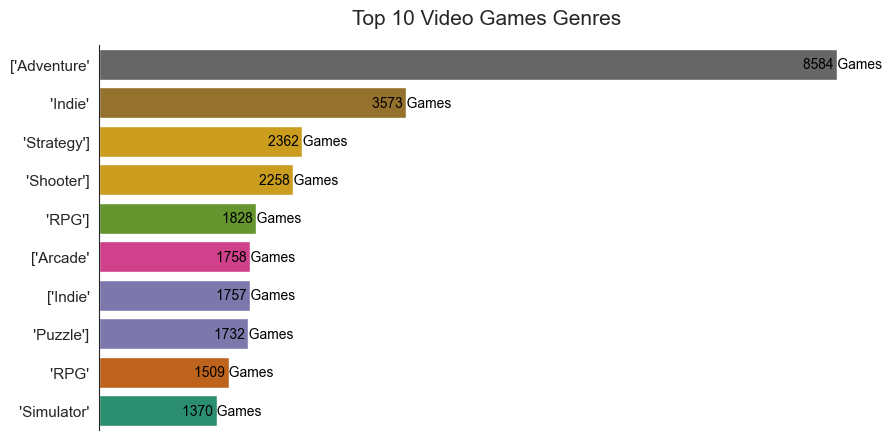

In [120]:
fig, ax = plt.subplots(figsize=(10, 5))

sns.barplot(x=popularity[:10].values, y=popularity[:10].index, palette = 'Dark2_r', ax=ax)

for i, v in enumerate(popularity[:10].values):
    ax.text(v + 180 / 3, i, str(f"{v} Games"), color = "black" , ha="center", va="center")

ax.set_title("Top 10 Video Games Genres", fontsize=15, pad=15)
ax.set_xlabel("")
ax.set_ylabel("")

ax.set_xticklabels([])
ax.tick_params(axis='y', labelsize=11)
sns.despine(right=True, top=True, bottom=True)
plt.show()


#### 1. What is the most popular game in each genre.

In [27]:
popularity_df = popularity.to_frame(name="popularity")

df_pop = df.merge(popularity_df, left_on='Genres', right_index=True)
grouped = df_pop.groupby("Genres")

def get_most_pop_game(group: pd.DataFrame) -> pd.Series:
    most_popular_game = group.loc[group['popularity'].idxmax()]
    return most_popular_game["Title"]
most_popular_game = grouped.apply(get_most_pop_game)

In [127]:
most_popular_game.to_frame().reset_index().rename({"Genres":"Game Genre", 0:"Most Popular Game"}, axis=1)

,Game Genre,Most Popular Game
0,['Adventure'],The Legend of Zelda: Tears of the Kingdom
1,['Arcade'],Chrome Dino
2,['Brawler'],Devil May Cry
3,['Card & Board Game'],Mario Party Superstars
4,['Fighting'],MultiVersus
5,['Indie'],Pineapple on pizza
6,['MOBA'],Heroes of the Storm
7,['Music'],Friday Night Funkin'
8,['Pinball'],3D Pinball: Space Cadet
9,['Platform'],Super Mario Bros. 3


#### 2. The trend of games rating over time (release date)

In [28]:
df.columns

Index(['Title', 'Release_Date', 'Platforms', 'Genres', 'Rating', 'no_of_plays',
       'active_players', 'Backlogs', 'Wishlist'],
      dtype='object')

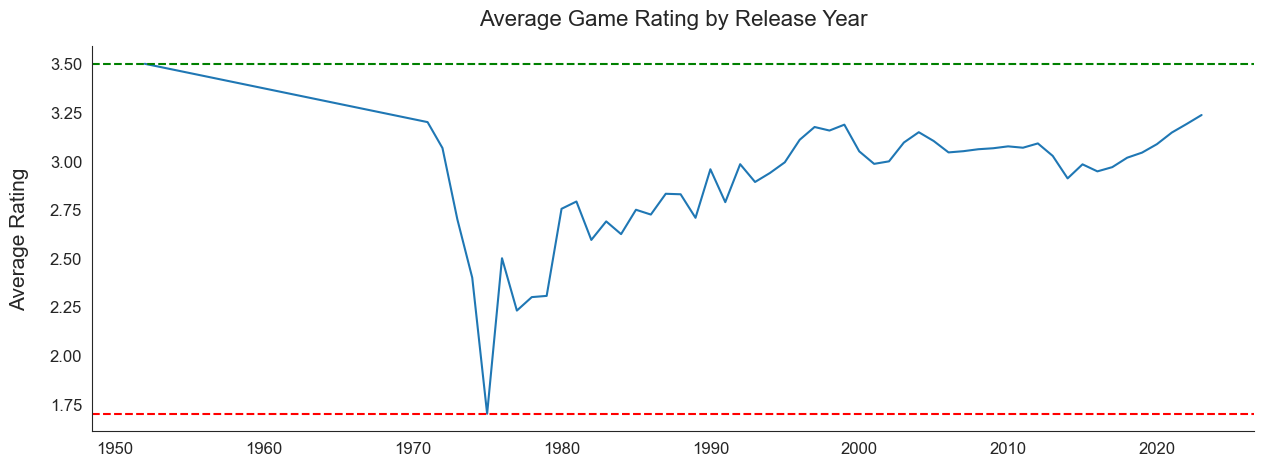

In [34]:
# Extracting the release year from the release_date column
df["Release_Year"] = df["Release_Date"].dt.year

# Grouping the data by release year and calculate the average rating for each year
yearly_avg_rating = df.groupby("Release_Year")["Rating"].mean().reset_index()

# Setting the plot size
plt.figure(figsize=(15, 5))

# Plotting the average rating by release year using Seaborn
sns.lineplot(data=yearly_avg_rating, x="Release_Year", y="Rating")

# Despining the plot from the top and left
sns.despine(top=True, right=True)

# Adding a descriptive title to the plot
plt.title("Average Game Rating by Release Year", fontsize=16, pad=15)

# Increasing the padding space between the title, x-label and y-label and the plot
plt.xlabel("")
plt.ylabel("Average Rating", labelpad=15, fontsize=15)

# Increasing the font-size of the x-axis and y-axis ticks
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Adding horizontal lines to indicate the maximum and minimum values on the y-axis
plt.axhline(y=yearly_avg_rating["Rating"].max(), color="green", linestyle="--")
plt.axhline(y=yearly_avg_rating["Rating"].min(), color="red", linestyle="--")

# Showing the plot
plt.show()

#### 3. The level of engagement of players with games

In [35]:
df.columns

Index(['Title', 'Release_Date', 'Platforms', 'Genres', 'Rating', 'no_of_plays',
       'active_players', 'Backlogs', 'Wishlist', 'Release_Year'],
      dtype='object')

In [36]:
df_engagement = df[df['active_players'] != 0]
df_engagement['avg_plays_per_player'] = round(df_engagement['no_of_plays'] / df_engagement['active_players'])
df_engagement = df_engagement.sort_values(by = 'avg_plays_per_player', ascending=False)
df_engagement.head()                                              

,Title,Release_Date,Platforms,Genres,Rating,no_of_plays,active_players,Backlogs,Wishlist,Release_Year,avg_plays_per_player
1584,Duck Hunt,1984-04-21,"['Wii U', 'Arcade', 'NES', 'Family Computer (F...","['Arcade', 'Shooter']",3.0,3500,1,104,48,1984,3500.0
1949,Slither.io,2016-03-25,"['Windows PC', 'Android', 'Mac', 'Linux', 'iOS...","['Arcade', 'Simulator']",2.2,2500,1,26,4,2016,2500.0
1439,Fruit Ninja Classic,2010-04-20,"['Android', 'iOS']",['Arcade'],2.7,4500,2,40,12,2010,2250.0
2388,Dragon Ball Z: Budokai Tenkaichi,2005-10-06,['PlayStation 2'],['Fighting'],2.9,1800,1,76,42,2005,1800.0
2254,Ms. Pac-Man,1982-01-13,"['Atari 7800', 'Arcade', 'Atari 8-bit', 'Sega ...",['Arcade'],3.6,1700,1,52,43,1982,1700.0


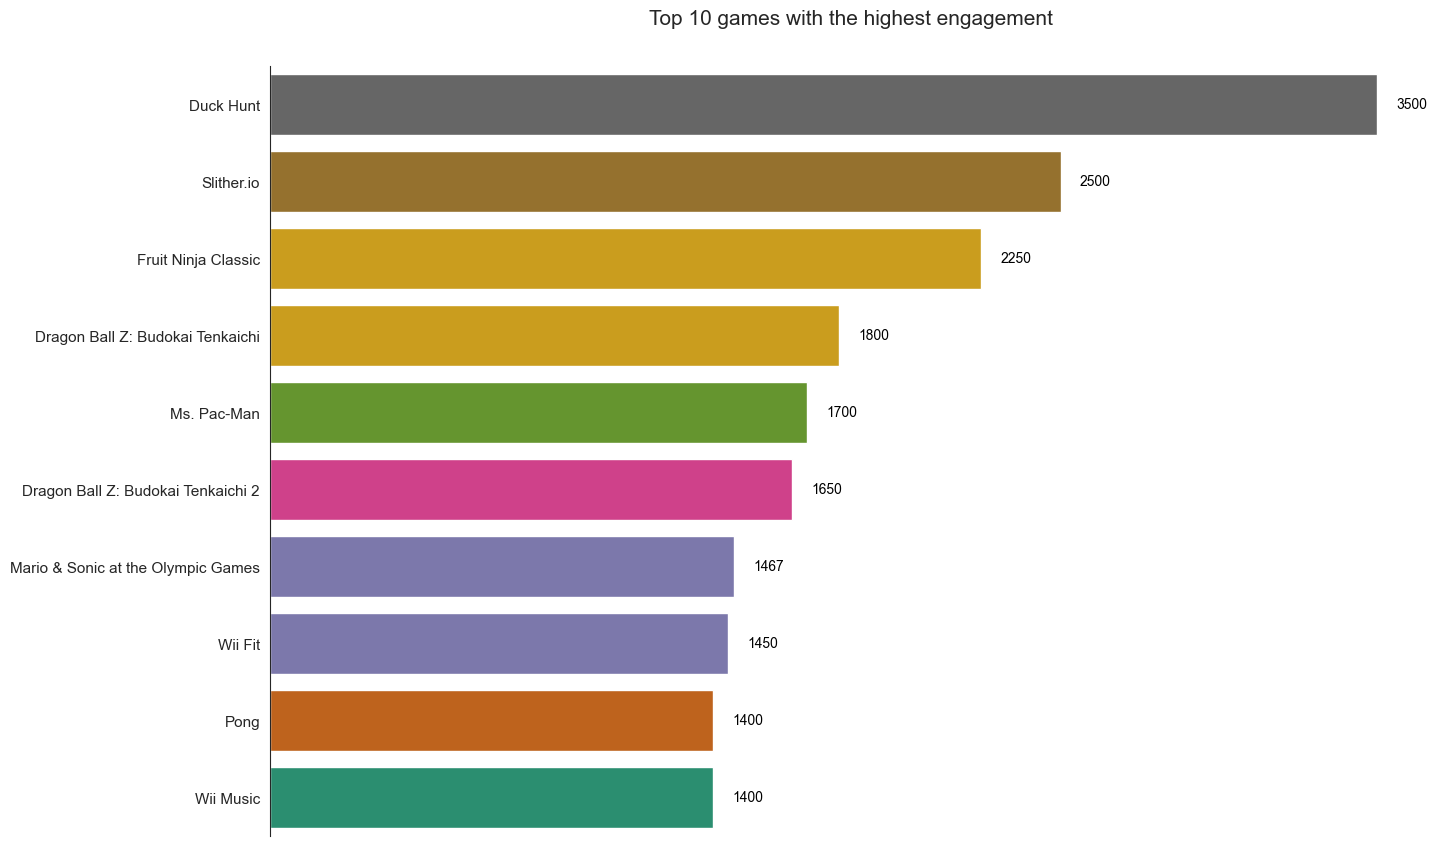

In [40]:
fig, ax = plt.subplots(figsize=(15,10))
sns.barplot(data = df_engagement.head(10), x="avg_plays_per_player", y="Title", palette="Dark2_r")

for i, v in enumerate(df_engagement["avg_plays_per_player"].head(10).values):
    ax.text(v + 220/2, i, str(round(v)), color="black", ha="center", va="center")

ax.set_title("Top 10 games with the highest engagement", fontsize=15, pad=30)
ax.set_xlabel("")
ax.set_ylabel("")

ax.set_xticklabels([])
ax.tick_params(axis="y", labelsize=11)

sns.despine(top=True, right=True, bottom=True)
plt.show()

#### 4. Correlation between backlogging, rating and wishlist variables


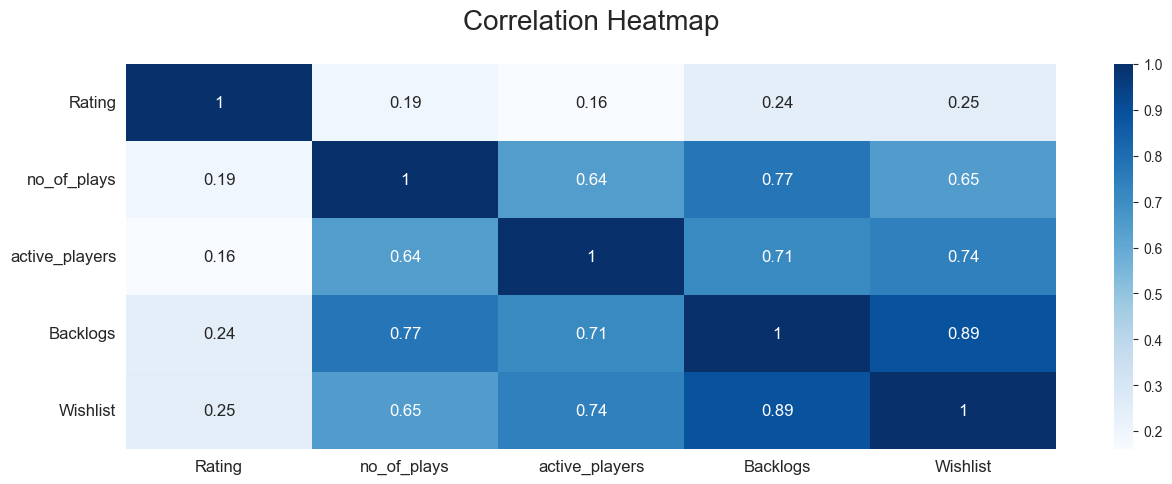

In [90]:
# Calculating the correlation matrix
numeric_df = df.select_dtypes(include=['float64', 'int64'])
corr_matrix = numeric_df.corr()

# Setting up the figure size
fig, ax = plt.subplots(figsize=(15, 5))

# Creating the heatmap
sns.heatmap(corr_matrix, annot=True, cmap="Blues", annot_kws={"size": 12}, ax=ax)

# Setting up the title
ax.set_title("Correlation Heatmap", fontsize=20, pad=25)

# Setting the x-axis and y-axis ticks sizes
ax.tick_params(axis="both", labelsize=12)

# Showing the plot
plt.show()

In [76]:
df.columns

Index(['Title', 'Release_Date', 'Platforms', 'Genres', 'Rating', 'no_of_plays',
       'active_players', 'Backlogs', 'Wishlist', 'Release_Year'],
      dtype='object')

In [61]:
wishlist_backlog = df.groupby('Wishlist')['Backlogs'].mean().reset_index()
wishlist_backlog.columns = ['Wishlist', 'Average Backlogs']

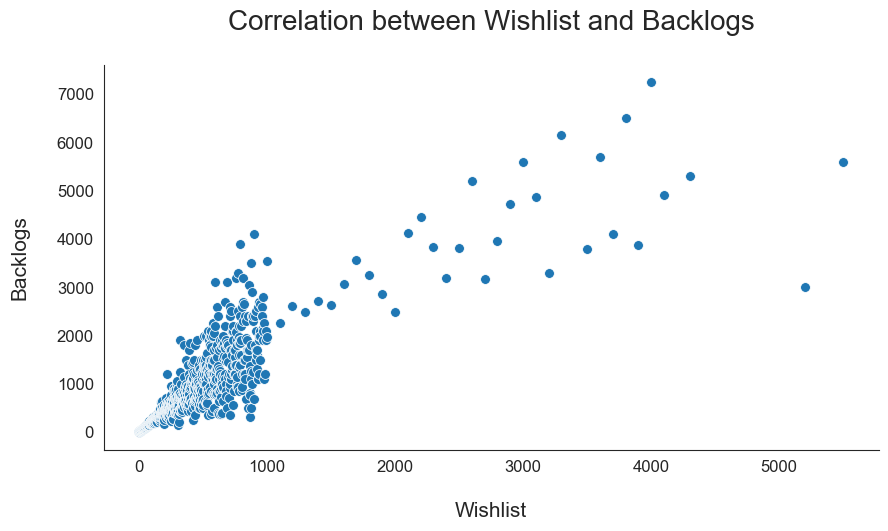

In [62]:
# Setting the plot's figure size
fig, ax = plt.subplots(figsize=(10, 5))

# plotting the scatterplot
ax = sns.scatterplot(data=wishlist_backlog, x="Wishlist", y="Average Backlogs", s=50)

# Despine the plot from the right and top
sns.despine(ax=ax, top=True, right=True)

# Add a descriptive title and increase its size and add padding
ax.set_title("Correlation between Wishlist and Backlogs", fontsize=20, pad=25)

# Increase the size of the x-axis and y-axis ticks
ax.tick_params(axis="both", labelsize=12)

# Increase the size of the x-axis and y-axis labels and add paddings
ax.set_xlabel("Wishlist", fontsize=15, labelpad=20)
ax.set_ylabel("Backlogs", fontsize=15, labelpad=20)

plt.show()

In [59]:
# Grouping the data by the 'rating' column and calculating the mean of the 'backlogs' column for each group
rating_backlogs = df.groupby("Rating")["Backlogs"].mean().reset_index()

# Renaming the columns for clarity
rating_backlogs.columns = ["Rating", "Average Backlogs"]

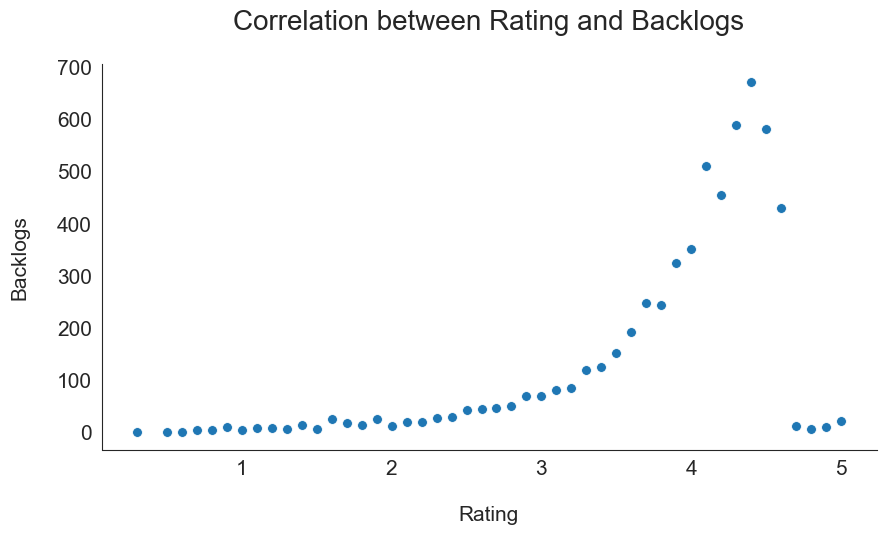

In [60]:
# Setting the plot's figure size
fig, ax = plt.subplots(figsize=(10, 5))

# plotting the scatterplot
ax = sns.scatterplot(data=rating_backlogs, x="Rating", y="Average Backlogs", s=50)

# Despine the plot from the right and top
sns.despine(ax=ax, top=True, right=True)

# Add a descriptive title and increase its size and add padding
ax.set_title("Correlation between Rating and Backlogs", fontsize=20, pad=25)

# Increase the size of the x-axis and y-axis ticks
ax.tick_params(axis="both", labelsize=15)

# Increase the size of the x-axis and y-axis labels and add paddings
ax.set_xlabel("Rating", fontsize=15, labelpad=20)
ax.set_ylabel("Backlogs", fontsize=15, labelpad=20)

# Show the plot
plt.show()

In [ ]:
# Conclusion

# My analysis of popular video games from 1980 to 2023 revealed several key insights. 
# We found that the most popular video game genres are Adventure, followed by RPG, Platform,
# and Shooter. Within these genres, some of the most popular games include Metal Gear Solid 2:
# Sons of Liberty (Adventure), Chrome Dino (Arcade), Devil May Cry (Brawler), and Mario Party
# Superstars (Card & Board Game).

# I also observed that the average rating of video games experienced significant fluctuations 
# from 1980 through the 1990s, with a notable decline in the late 1980s. However, starting in
# the 2000s, the average rating has become more stable and consistent.

# In terms of player engagement, I found that Fruit Ninja Classic had the highest level of 
# engagement, followed by Slither.io, Happy Wheels, and Ms. Pac-Man.

# Our analysis also revealed a strong correlation between the 'Wishlist' and 'Backlogs'
# variables. This suggests that people who have added a game to their wishlist are likely to 
# have access to it but may not have started playing it yet. Furthermore, we found that games 
# with high ratings and high wishlist counts tend to have the most backlogged players.